In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve,auc

In [2]:
df=pd.read_csv("US_Heart_Patients.csv")
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [3]:
# Target Variable: TenYearCHD (Likely to get a Heart attack or not)
# Where 0 represents as No, And 1 represents as Yes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
df.isnull().sum()*100/len(df) #checking the percentage of null value

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

In [6]:
df=df.fillna(method="ffill") # forwardfill

In [7]:
df.isnull().sum() # checking for any null value

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [34]:
# shape of the dataset
df.shape

(4240, 16)

In [ ]:
# 4240 columns,16 rows

In [8]:
df.describe() # statstical details

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.981368,0.494104,9.019104,0.029481,0.005896,0.310613,0.025708,236.721934,132.354599,82.897759,25.792328,75.876651,81.981368,0.151887
std,0.495027,8.572942,1.020378,0.500024,11.933225,0.169171,0.076569,0.462799,0.158280,44.598191,22.033300,11.910394,4.078078,12.024887,23.880905,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.067500,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
# Checking my Target Columns how many categories are there
df.TenYearCHD.value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

<AxesSubplot:>

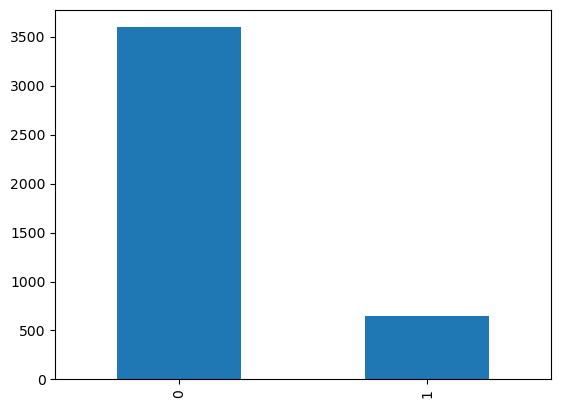

In [10]:
df.TenYearCHD.value_counts().plot.bar() 

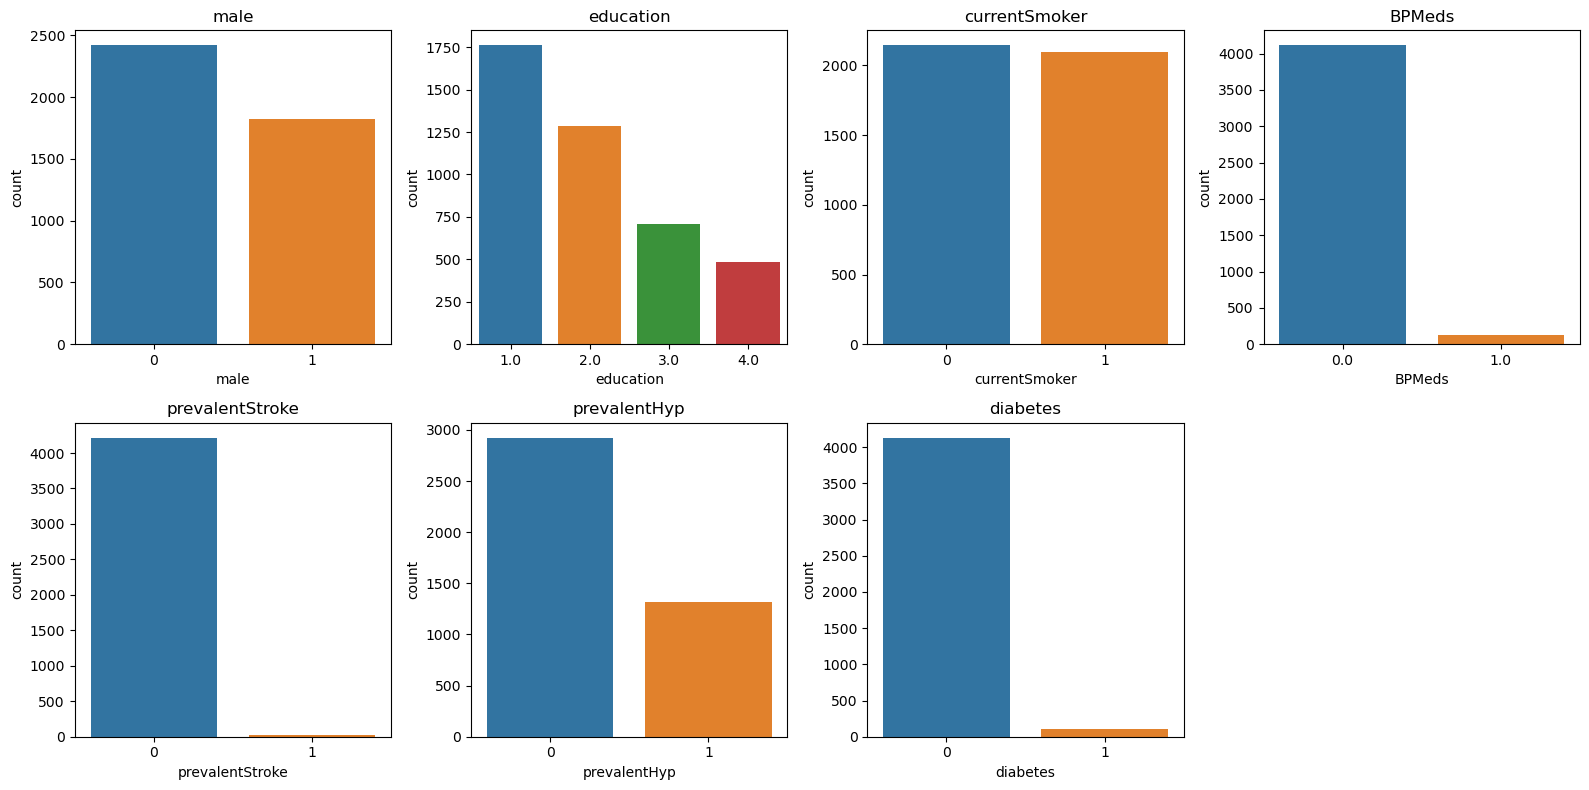

In [43]:
# Plotting of categorical variable using barplot
categorical_variable = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

plt.figure(figsize=(16, 8))
for i, var in enumerate(categorical_variable):
    plt.subplot(2, 4, i + 1)
    sns.countplot(data=df, x=var)
    plt.title(var)

plt.tight_layout()
plt.show()


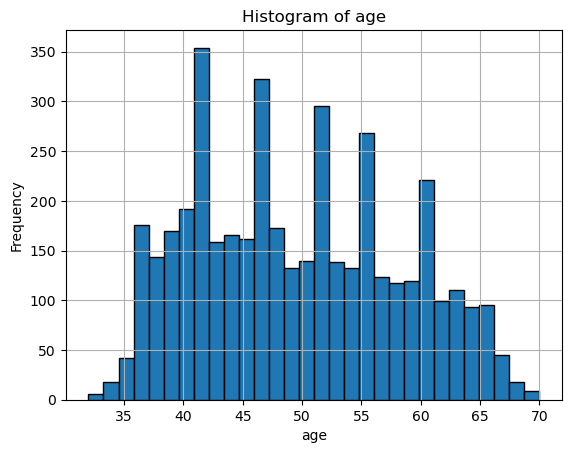

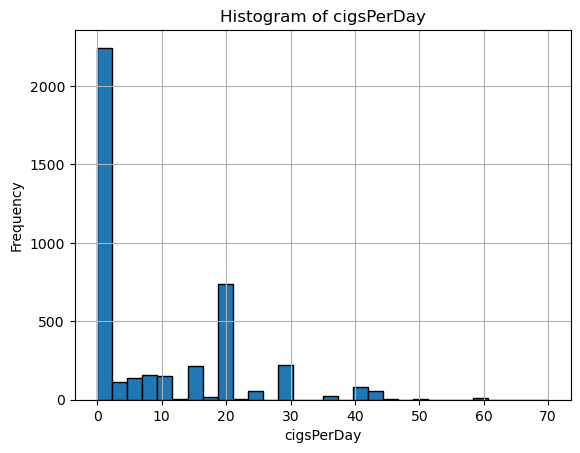

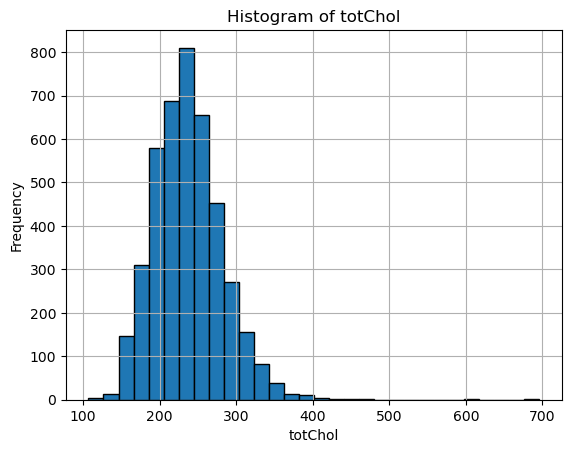

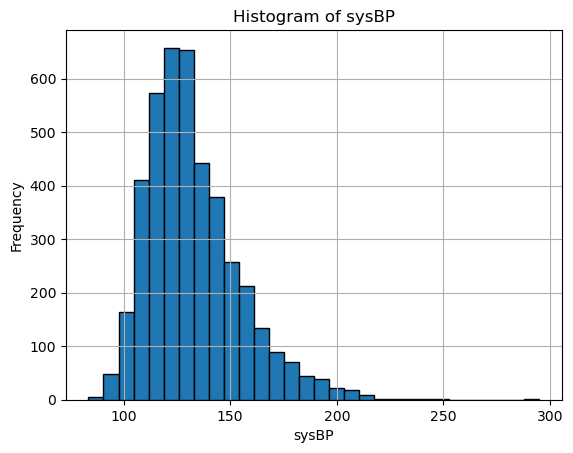

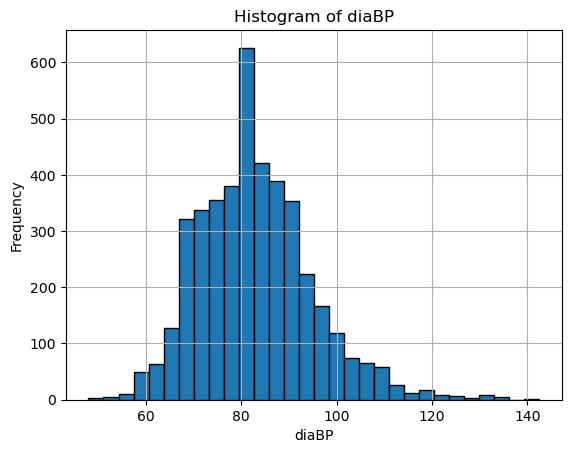

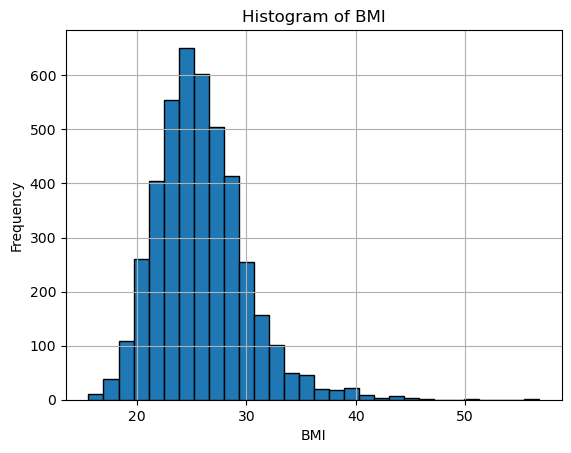

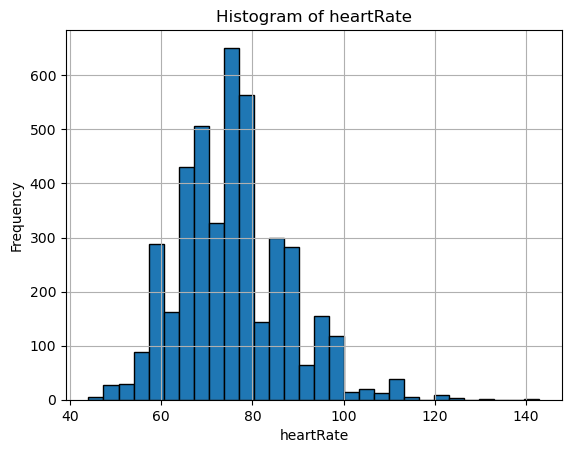

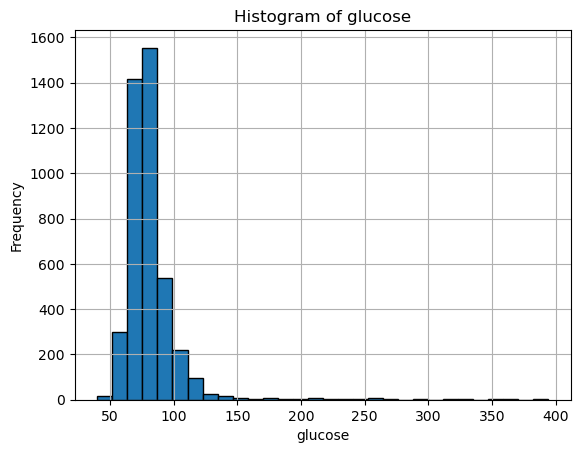

In [51]:
# plotting of continuous variable using histogram
continuous_variable = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

for var in continuous_variable:
    df[var].hist(bins=30, edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()


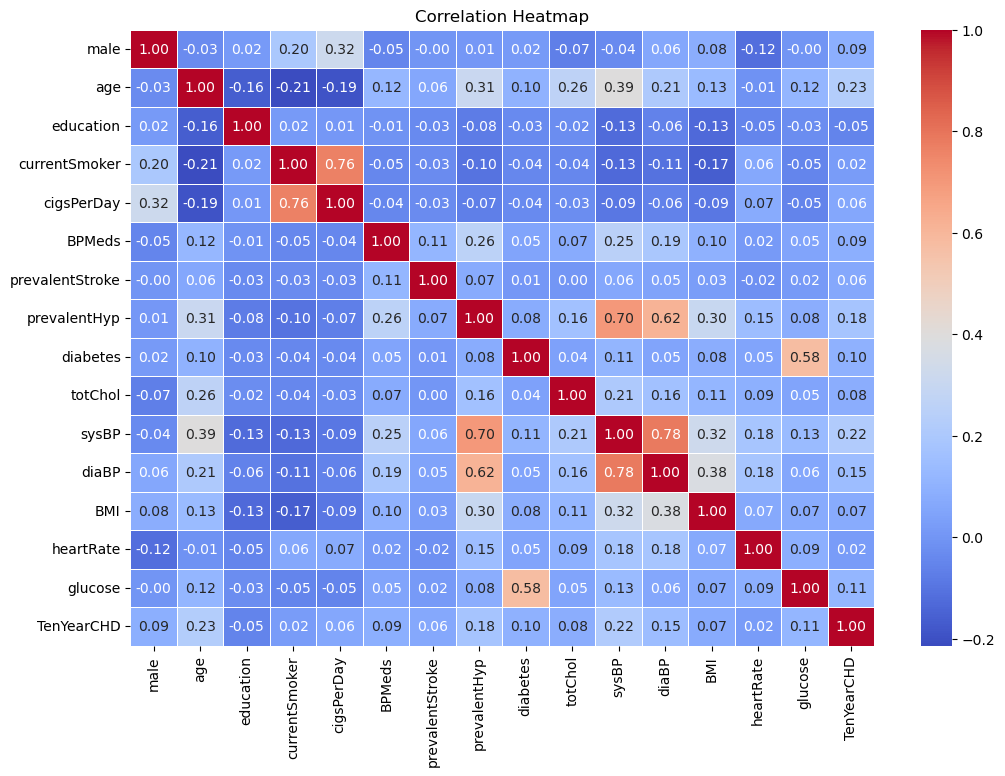

In [42]:
# Heatmap 
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [11]:
# For further Analysis we are going use ML algorithms, by dividing data into x and y

In [12]:
# Dividing my data into x and y
y = df["TenYearCHD"]
X = df.drop("TenYearCHD", axis=1)

In [13]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [14]:
# checking the split of the data in y_train and x_test and checking the dimensions with shape
print(y_train.shape) 
print(x_test.shape)

(2968,)
(1272, 15)


In [15]:
# It seems the y_train is in 2d array, and x_test is in 1d array

In [16]:
# Using Logistic Regression, providing a parameter as "solver"
lr = LogisticRegression(solver="liblinear")#liblinear - converts the numerical integration into probabilistic way, basically converting linear regression equation into log format
lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [17]:
# Predicting and finding the probability
y_pred_train = lr.predict(x_train)
y_train_prob = lr.predict_proba(x_train)

In [18]:
y_train_prob 

array([[0.87775162, 0.12224838],
       [0.83103201, 0.16896799],
       [0.8938293 , 0.1061707 ],
       ...,
       [0.81717042, 0.18282958],
       [0.6958967 , 0.3041033 ],
       [0.95560253, 0.04439747]])

In [19]:
# Here, i am getting the prob in the form 0 and 1 (1st column 0 and 2nd column 1) And also P.T.R, its in the form failure or success, spam or not.

In [20]:
# Now, suppose i want to check the prob of column 1
y_train_prob[:,1]

array([0.12224838, 0.16896799, 0.1061707 , ..., 0.18282958, 0.3041033 ,
       0.04439747])

In [21]:
# Accuracy of our model
print("accuracy score on train",accuracy_score(y_train,y_pred_train))

accuracy score on train 0.851078167115903


In [22]:
# Confusion matrix
confusion_matrix(y_train,y_pred_train)

array([[2504,    9],
       [ 433,   22]], dtype=int64)

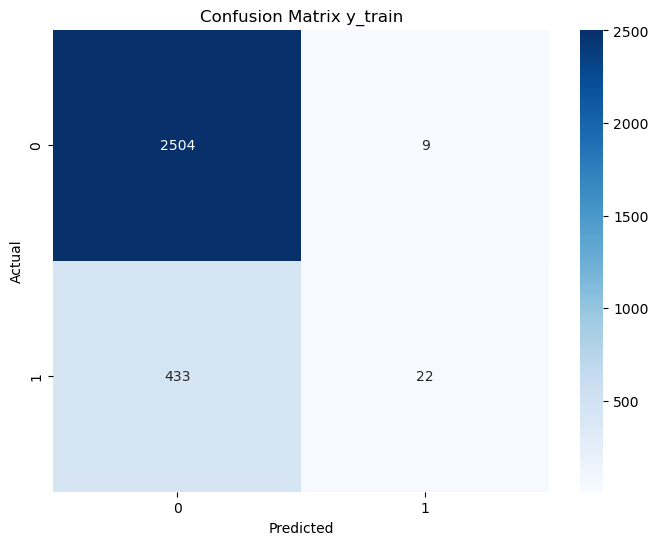

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_train,y_pred_train), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix y_train')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
# Now, checking for the y_test 
y_test_pred=lr.predict(x_test)
y_test_prob=lr.predict_proba(x_test)

In [25]:
y_test_prob

array([[0.92537183, 0.07462817],
       [0.95294461, 0.04705539],
       [0.73373516, 0.26626484],
       ...,
       [0.90073339, 0.09926661],
       [0.74273328, 0.25726672],
       [0.6479152 , 0.3520848 ]])

In [26]:
# Accuracy of our model
print("accuracy score on test",accuracy_score(y_test,y_test_pred))

accuracy score on test 0.8553459119496856


In [27]:
# Confusion matrix
confusion_matrix(y_test,y_test_pred)

array([[1083,    0],
       [ 184,    5]], dtype=int64)

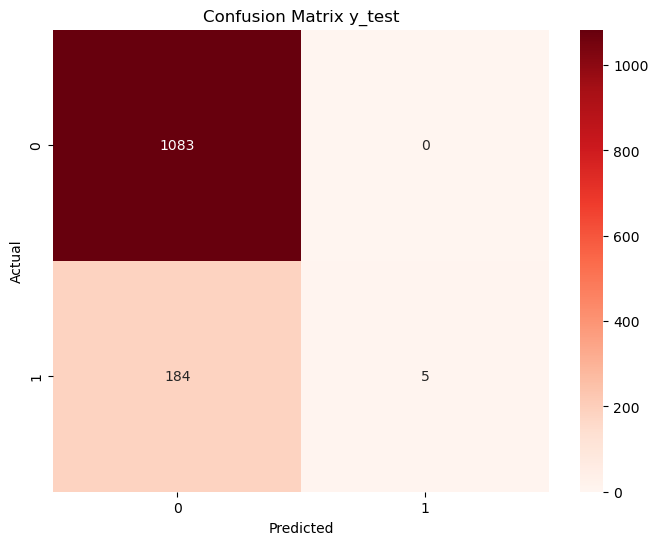

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_test_pred), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix y_test')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
# roc_auc_score
print("roc_auc_score y_train",roc_auc_score(y_train,y_train_prob[:,1]))
print("roc_auc_score y_test",roc_auc_score(y_test,y_test_prob[:,1]))

roc_auc_score y_train 0.7239768587958003
roc_auc_score y_test 0.729240254632683


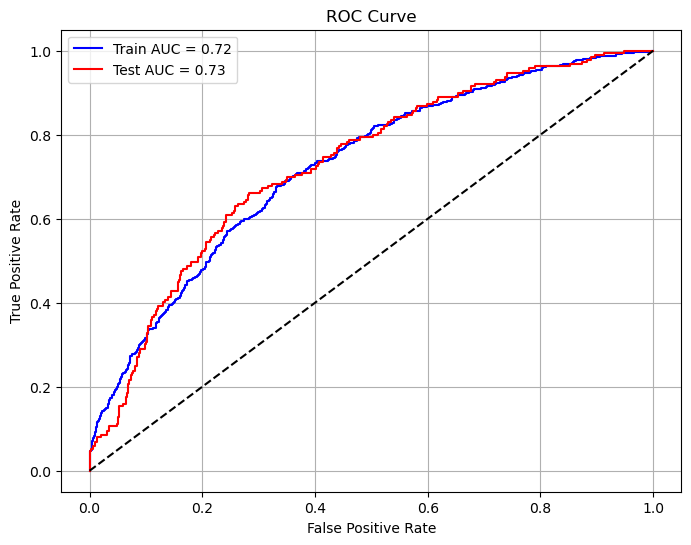

In [30]:
# roc_curve
# ROC curve for training data
fpr_train, tpr_train, threshold = roc_curve(y_train,y_train_prob[:,1])
roc_auc_train = auc(fpr_train, tpr_train)

# ROC curve for testing data
fpr_test, tpr_test, threshold = roc_curve(y_test,y_test_prob[:,1])
roc_auc_test = auc(fpr_test, tpr_test)

# Plotting both ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {roc_auc_train:.2f}', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {roc_auc_test:.2f}', color='red')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Logistic Regression gave a reasonably good fit for predicting CHD risk.
# Age, blood pressure, and glucose were strong indicators of risk.